**Imports**

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

**Load Dataset**

In [2]:
data = datasets.load_breast_cancer()
X = data.data
y = data.target

**Train-Test Split**

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

**Feature Scaling**

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Train SVM**

In [5]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

**Prediction**

In [6]:
y_pred = svm_model.predict(X_test)

**Confusion Matrix**

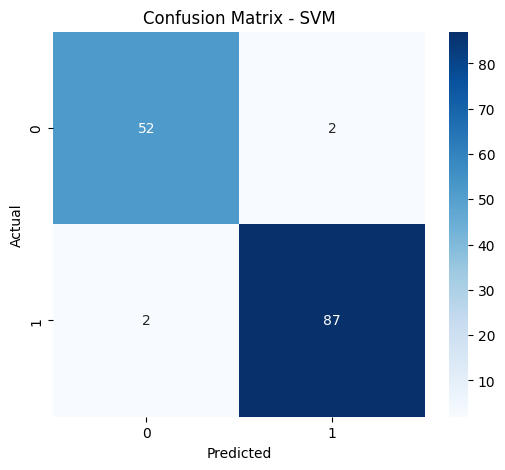

In [7]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()

**Metric Calculation**

In [8]:
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * precision * recall / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.972027972027972
Precision: 0.9775280898876404
Recall: 0.9775280898876404
F1 Score: 0.9775280898876404


**Decision Boundary Visualization**

In [11]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_pca, y, test_size=0.25, random_state=42
)

scaler2 = StandardScaler()
X_train2 = scaler2.fit_transform(X_train2)
X_test2 = scaler2.transform(X_test2)

svm_2d = SVC(kernel='linear')
svm_2d.fit(X_train2, y_train2)

SVC(kernel='linear')

**Plot decision boundary**

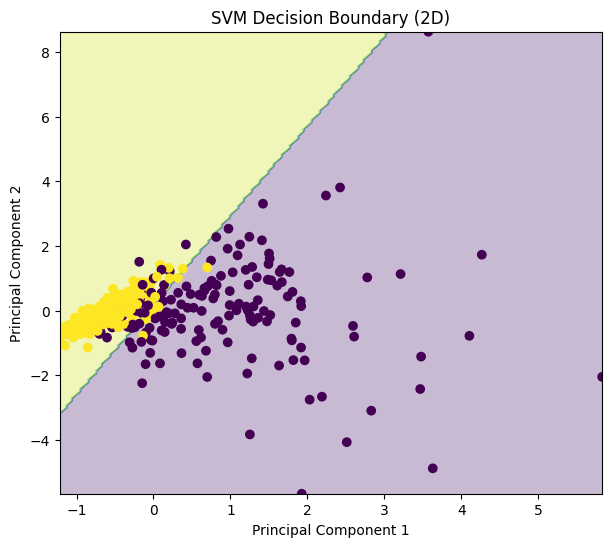

In [13]:
xx, yy = np.meshgrid(
    np.linspace(X_train2[:,0].min(), X_train2[:,0].max(), 200),
    np.linspace(X_train2[:,1].min(), X_train2[:,1].max(), 200)
)

Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7,6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train2[:,0], X_train2[:,1], c=y_train2)
plt.title("SVM Decision Boundary (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [15]:
svm_results = pd.DataFrame({
    "Accuracy": [accuracy],
    "Precision": [precision],
    "Recall": [recall],
    "F1 Score": [f1]
})

svm_results.index = ["SVM"]

print("\nPerformance Table:\n")
print(svm_results)


Performance Table:

     Accuracy  Precision    Recall  F1 Score
SVM  0.972028   0.977528  0.977528  0.977528
